<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/BinaryClassification_Spring25_Assigment_01_CoimbraBreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Assignment 1: Convolutional Neural Networks (CNN) for Computer Vision**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)



# **The Purpose of Assignments**

In this course, **Assignments** are designed to help me (and you) assess your ability to transfer knowledge gained in completing class coding exercises to solving more realistic problems.

Assignments play a pivotal role in reinforcing your learning, as they require you to apply theoretical concepts to practical scenarios. This helps solidify your understanding and enhances your problem-solving skills. By tackling these assignments independently, you develop critical thinking and the ability to synthesize information from various sources. Moreover, assignments encourage you to explore topics more deeply, fostering intellectual curiosity and promoting a deeper engagement with the subject matter. Ultimately, these assignments are not just a measure of your learning, but a means to equip you with the skills needed for real-world applications and future challenges.

## **MAKE A COPY OF THIS NOTBOOK!**

For your assignment to be graded, you **must** make a copy of this Colab notebook in your GDrive and you **must** use this copy as your worksheet.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this assignment.")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


Your GMAIL address **must** appear in the output in order for your work to be graded.

### Define functions

The cell below creates several functions that are needed for this assignment. If you don't run this cell, you will receive errors later when you try to run some cells.

In [14]:
# Create functions for this lesson

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix',
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


def list_float_columns(dataframe):
    """
    Create a list of all columns in a DataFrame that contain float values.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to check.

    Returns:
    list: A list of column names that contain float values.
    """
    float_columns = [col for col in dataframe.columns if dataframe[col].dtype == 'float64']
    return float_columns

# **Assigment 1: Binary Classification**

**Assignment_01** is specifically designed to assess your ability to write the Python/Tensorflow/Keras code necessary to build neural networks that can perform binary classification, classification or regression on tabular data. Based on the 1st digit in your myUTSA ID ('abc123'), you have been assigned to perform **binary classification**.

Unlike your class lessons, you will **not** be given examples that you can use to simply copy-and-paste code. Rather, you will be given a problem to solve and it will be up to you to use code snippets that you have been given previously to solve different aspects of this assignment. And unlike your class lessons, your will **not** be given the correct output. In other words, this assignment is basically how you would solve an actual biomedical problem.


# **Binary Classification by Neural Networks**

**Binary classification** of tabular data is a type of supervised learning task where the goal is to categorize observations into one of two possible classes based on their attributes.

#### **Binary Classification:**
Binary classification deals with problems where there are only two possible outcomes. Examples include:

1. **Disease Diagnosis:**

- Does the patient have diabetes? (Yes/No)

- Is this breast tumor malignant? (Yes/No)

- Does the patient have hypertension? (Yes/No)

- Is the patient infected with COVID-19? (Yes/No)

2. **Medical Outcomes:**

- Will the patient survive after a heart attack? (Yes/No)

- Will the patient respond positively to a specific treatment? (Yes/No)

- Does the patient have a higher risk of developing heart disease? (Yes/No)

3. **Medical Conditions and Symptoms:**

- Is the patient experiencing symptoms of depression? (Yes/No)

- Does the patient have sleep apnea? (Yes/No)

- Is the patient at risk for osteoporosis? (Yes/No)

- Does the patient have a genetic predisposition to a certain condition? (Yes/No)

4. **Medical Procedures:**

- Is surgery recommended for this patient? (Yes/No)

- Does the patient need a blood transfusion? (Yes/No)

- Is the patient a candidate for a particular clinical trial? (Yes/No)

Here’s a step-by-step guide on how to perform regression using neural networks:

#### **Data Preparation:**

- **Collect Data:** Obtain a dataset with numerical features and a continuous target variable.

- **Clean Data:** Handle missing values, outliers, and erroneous entries.

- **Data Normalization:** Normalize your data (e.g. convert to Z-scores) to help the neural network learn more efficiently.

- **Data Pre-Processing:** Create X- and Y-feature vectors.

- **Split Data:** Divide your data into training, and test sets

#### **Neural Network Model**

- **Build the Neural Network Model:** Use TensorFlow and Keras to define the neural network architecture.

- **Train the Model:** Fit the model to your training data, using the validation set to monitor performance.

- **Evaluate the Model:** Assess the model’s performance on the test set using metrics like accuracy, precision, recall, and Confusion Matrix:

# **Your Dataset for Assignmment_01**

The **_first_**  digit in your myUTSA ID (e.g. "abc123") will determine which dataset you are to analyze for this assignment and which type of neural network (i.e. classification or regression) you will need to construct. For example, if your myUTSA ID was **vue682**, then your first digit is the number `6`.

**---WARNING------WARNING------WARNING------WARNING------WARNING------WARNING---**

You are **not** free to choose any dataset for this assignment. If analyze the wrong dataset, your assignment will **NOT BE GRADED**. If you are uncertain which dataset you should be working on, contact your Instructor for help. Remember, your score in this assignment will have a large impact on your course grade so please be careful.


| First Digit myUTSA ID    | Dataset to Analyze      | Neural Network Type
--------------------------|-------------------------|-----------------
0                         | Hepatitis               | Binary Classification
1                         | Coimbra Breast Cancer   | Binary Classification
2                         | Parkinson Speech        | Binary Classification
3                         | Indian Liver            | Binary Classification
4                         | Thyroid Replacement     | Multiclass Classification
5                         | Wine Quality            | Multiclass Classification
6                         | Liver Disease           | Multiclass Classification
7                         | Bone Marrow Transplant  | Regression
8                         | German Breast Cancer    | Regression
9                         | Diabetes Progression    | Regression


## **Descriptions of Data Sets for Binary Classification**

This section describes the various datasets, information for downloading them, and what variable(s) your network should predict. Remember, you do **not** earn and credit if you analyze the wrong dataset. Pay particular attention to the variable for Binary Classification (Y values) for your assigned dataset. You will need to know the name of this feature when you are constructing yor X- and Y-feature vectors.


-----------------------------------------

## **Hepatitis Disease Classification - 1st myUTSA Digit = 0**

#### **Filename:** `hepatitis.csv`
#### **Response Variable for Regression (Y):** `Class`


### **Hepatitis Disease Classification Dataset**

The Hepatitis Disease Classification dataset contains patient records and clinical features used to predict the presence of hepatitis. The dataset includes demographic information and various liver function test results.

#### Features:
1. **Age**: Age of the patient.
2. **Sex**: Gender of the patient (Male/Female).
3. **Steroid**: Use of steroids (Yes/No).
4. **Antivirals**: Use of antiviral medication (Yes/No).
5. **Fatigue**: Presence of fatigue (Yes/No).
6. **Malaise**: Presence of malaise (Yes/No).
7. **Anorexia**: Presence of anorexia (Yes/No).
8. **Liver Big**: Size of the liver (Big/Not Big).
9. **Liver Firm**: Firmness of the liver (Firm/Not Firm).
10. **Spleen Palpable**: Palpability of the spleen (Yes/No).
11. **Spider Angiomas**: Presence of spider angiomas (Yes/No).
12. **Ascites**: Presence of ascites (Yes/No).
13. **Varices**: Presence of varices (Yes/No).
14. **Bilirubin**: Bilirubin levels (mg/dL).
15. **Alkaline Phosphatase**: Alkaline phosphatase levels (IU/L).
16. **SGOT/AST**: Serum Glutamic-Oxaloacetic Transaminase (AST) levels (IU/L).
17. **Albumin**: Albumin levels (g/dL).
18. **Prothrombin Time**: Prothrombin time (seconds).
19. **Histology**: Histological examination result (Yes/No).

#### Output (Y variable):
- **Class**: Indicates the presence or absence of hepatitis (0: No hepatitis, 1: Hepatitis).

-----------------------------------------

## **Coimbra Breast Cancer - 1st myUTSA Digit = 1**

#### **Filename:** `Coimbra_breast_cancer_dataset.csv`
#### **Response Variable for Regression (Y):** `Class`


### **Coimbra Breast Cancer Dataset**

The Coimbra Breast Cancer dataset contains clinical features observed or measured for patients with breast cancer and healthy controls. The dataset includes anthropometric data and parameters typically gathered in routine blood analysis. Each patient record is described by 9 features and a binary dependent variable indicating the presence or absence of breast cancer.

#### Features:
1. **Age**: Age of the patient (years).
2. **BMI**: Body Mass Index (kg/m²).
3. **Glucose**: Glucose levels (mg/dL).
4. **Insulin**: Insulin levels (µU/mL).
5. **HOMA**: Homeostatic Model Assessment (HOMA).
6. **Leptin**: Leptin levels (ng/mL).
7. **Adiponectin**: Adiponectin levels (µU/mL).
8. **Resistin**: Resistin levels (ng/mL).
9. **MCP-1**: Monocyte Chemoattractant Protein-1 levels (pg/dL).

#### Output (Y variable):
- **Class**: Indicates the presence or absence of breast cancer (`Breast_Cancer`, `Healthy`).



## **Liver Disease - 1st myUTSA Digit = 2**

#### **Filename:** `liver_disease.csv`
#### **Response Variable for Regression (Y):** `Class`

### Liver Disease Dataset Features

The Liver Disease dataset contains patient records and liver function test results, used to predict the presence of liver disease. The dataset includes demographic information and various clinical parameters.

#### Features:
1. **Age**: Age of the patient.
2. **Gender**: Gender of the patient (Male/Female).
3. **TB**: Bilirubin levels.
4. **DB**: Alkaline phosphatase levels.
5. **Alk Phos**: Alkaline phosphatase levels.
6. **SGOT/AST**: Serum Glutamic-Oxaloacetic Transaminase (AST) levels.
7. **SGPT/ALT**: Serum Glutamic-Pyruvic Transaminase (ALT) levels.
8. **TP**: Total proteins.
9. **ALB**: Albumin levels.
10. **AGT**: A/G ratio (Albumin/Globulin ratio).
11. **Class**: Liver disease status (0: No disease, 1: Diseased).

#### Output:
- **Class**: Indicates whether the patient has liver disease (0: No disease, 1: Diseased).

The dataset is commonly used for classification tasks to predict liver disease based on the given features.

Would you like to know more about how to analyze this dataset or any specific details?


-------------------------------------
## **Parkinson Speech Dataset - 1st myUTSA Digit = 2**

#### **Filename:**`Parkinson_speech.csv`
#### **Response Variable for Regression (Y):** `Class`

### **Parkinson Speech Dataset**

The Parkinson Speech dataset contains voice recordings from patients with Parkinson's Disease and healthy controls. The dataset includes various voice parameters and is used to classify the presence of Parkinson's Disease.

#### Features:
1. **Subject**: Unique identifier for each subject.
2. **Age**: Age of the subject.
3. **Gender**: Gender of the subject (0: Male, 1: Female).
4. **Test_time**: Time since recruitment into the trial (days).
5. **Motor_UPDRS**: Clinician’s motor UPDRS score.
6. **Total_UPDRS**: Clinician’s total UPDRS score.
7. **Jitter (%)**: Measure of variation in fundamental frequency.
8. **Jitter (Abs)**: Absolute measure of jitter.
9. **Jitter. RAP**: Jitter relative average perturbation.
10. **Jitter. PPQ5**: Jitter period perturbation quotient.
11. **Jitter. DDP**: Jitter difference to the previous period.
12. **Shimmer**: Measure of variation in amplitude.
13. **Shimmer (dB)**: Shimmer in decibels.
14. **Shimmer. APQ3**: Shimmer amplitude perturbation quotient.
15. **Shimmer. APQ5**: Shimmer amplitude perturbation quotient.
16. **Shimmer. APQ11**: Shimmer amplitude perturbation quotient.
17. **Shimmer. DDA**: Shimmer difference to the previous amplitude.
18. **NHR**: Harmonic-to-noise ratio.
19. **HNR**: Harmonic-to-noise ratio.
20. **RPDE**: Recurrence period density entropy.
21. **DFA**: Detrended fluctuation analysis.
22. **PPE**: Pitch period entropy.

#### Output (Y variable):
- **Class**: Indicates the presence of Parkinson's Disease (0: Healthy, 1: Parkinson's Disease).


----------------------------------------

## **Indian Liver Patient Dataset - 1st myUTSA Digit = 3**

#### **Filename:** Indian_Liver_Patient.csv`
#### **Response Variable for Regression (Y):** `Class`


### **Indian Liver Patient Dataset**

The Indian Liver Patient Dataset contains patient records and clinical features used to predict the presence of liver disease. The dataset includes demographic information and various biochemical markers.

#### Features:
1. **Age**: Age of the patient (years).
2. **Gender**: Gender of the patient (Male/Female).
3. **TB**: Total Bilirubin levels (mg/dL).
4. **DB**: Direct Bilirubin levels (mg/dL).
5. **Alkphos**: Alkaline Phosphatase levels (IU/L).
6. **SGPT**: Serum Glutamic-Pyruvic Transaminase (ALT) levels (IU/L).
7. **SGOT**: Serum Glutamic-Oxaloacetic Transaminase (AST) levels (IU/L).
8. **TP**: Total Proteins (g/dL).
9. **ALB**: Albumin levels (g/dL).
10. **A/G Ratio**: Albumin/Globulin ratio.

#### Output:
- **Selector**: Indicates the presence of liver disease (0: No disease, 1: Diseased).


# **General Instructions**

To make the assignment mpre manageable, you will given a number of specific steps to perform. For each step you will be given a specific example in a particular class lesson that you can use for a reference. For example, in **Step 1: Download and Extract Data** you are given **REF: Class_01_6 (Example 1)**. That means Example 1 in Class_01_6 provides similar code that you could use to complete that step of this assignment.

### **Variable Names**

In writing your code for this assignment, you are free to give your variables any name that makes sense to you. This includes the name of the DataFrame that holds your data. If you copy-and-paste code from earlier Class assignments, you always have to edit the name of the DataFrame to match the name you select for this assignment.

When it has been necessary to give an example name for a DataFrame in an instruction, the DataFrame has been called `dataFrameDF`. You will need to edit the name `dataFrameDF` to match the actual name you have given to your DataFrame.

### **Can I Use AI?**

You are free to use AI (e.g. Microsoft Co-Pilot) to help you complete your assignment---but you need to be very careful.

While AI can be very helpful in correcting coding errors, it can also give you code that is totally incorrect for this assignment. A small number of students in previous classes have flunked their assignment by using AI code that did not generate the correct output.

If your aren't sure what you are doing, it's much, much safer to get help with any of your coding problems from your course instructor and/or course TA's.

### **Step - 1: Download and Extract Data**

**REF: Class_01_6 (Example 1)**

As usual, a coding project starts with downloading a dataset. Since your dataset is in tabular form, you should use Pandas to read the datafile and store the information in a DataFrame. You are free to choose the name for all or your variables in this assignment, including the name of your DataFrame.

In the cell below, write the code to download your datafile from the course server and create a Pandas DataFrame to store your data. Use the function `display()` to show the data in 8 rows. For full credit, you need to show **all** of the columns in your DataFrame. You can do this by using the following code:

~~~text
# Set max columns and max rows
pd.set_option('display.max_columns', dataFrameDF.shape[1])
pd.set_option('display.max_rows', 8)
~~~

Remember, you will need to edit the name `dataFrameDF` to match the name you select for your DataFrame.

In [2]:
# Step 1: Download and Extract Data

import numpy as np
import pandas as pd

# Read file and create DataFrame
cbcDF = pd.read_csv(
    "https://biologicslab.co/BIO1173/data/Coimbra_breast_cancer_dataset.csv",
#    index_col=0,
    na_values=['NA','?'])

# Set max columns and max rows
pd.set_option('display.max_columns', cbcDF.shape[1])
pd.set_option('display.max_rows', 8)

# Display DataFrame
display(cbcDF)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Class
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Healthy
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Healthy
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Healthy
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Healthy
...,...,...,...,...,...,...,...,...,...,...
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,Breast_Cancer
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,Breast_Cancer
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,Breast_Cancer
115,86,27.180000,138,19.910,6.777364,90.2800,14.110000,4.35000,90.090,Breast_Cancer


If your code is correct you should see a table with a relatively large number of columns that may extend beyond the right edge of your notebook.

## **Step 2: Describe DataFrame**

**REF: Class_01_6 (Example 3)**

The `df.describe()` command in Python is used with pandas DataFrames. It provides a summary of statistics for each column in the DataFrame. By default, it will return the count, mean, standard deviation, min, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and max values for numerical columns. It can be a handy tool for getting a quick overview of your dataset!

Use the `df.describe()` command to summaries the data in your DataFrame. Make sure to replace the `df` with the actual name of your DataFrame.

Again use these commands to set the display options:

~~~text
# Set max columns and max rows
pd.set_option('display.max_columns', dataFrameDF.shape[1])
pd.set_option('display.max_rows', 8)
~~~


In [3]:
# Step 2: Describe DataFrame

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', cbcDF.shape[1])
pd.set_option('display.max_rows', 8)

# Describe() method with df1
cbcDF.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1
count,116.000000,116.000000,116.000000,112.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.011893,2.694988,26.615080,10.180874,14.725966,534.647000
std,16.112766,5.020136,22.525162,10.116735,3.642043,19.183294,6.843341,12.390646,345.912663
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000
25%,45.000000,22.973205,85.750000,4.355000,0.917966,12.313675,5.474283,6.881763,269.978250
50%,56.000000,27.662416,92.000000,6.036000,1.380939,20.271000,8.352692,10.827740,471.322500
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000


If your code is correct you should see a table with a relatively large number of columns that may extend beyond the right edge of your notebook and 8 rows countaining the summary statistics for each column.

## **Step 3: Find Missing Values**

**REF: Class_01_6 (Example 4)**

In **Biostatistics**, finding and replacing missing values is crucial for several reasons:

1. **Preserving Data Integrity**: Missing values can distort the analysis, leading to biased results. By addressing missing values, you ensure that your conclusions are based on complete and accurate data.

2. **Statistical Validity**: Many statistical tests and models require complete data. Missing values can reduce the statistical power of these tests, making it difficult to detect real effects.

3. **Avoiding Data Loss**: Simply discarding rows or columns with missing values can lead to a significant loss of data, especially if the dataset is already small. Imputing missing values helps retain as much data as possible.

4. **Model Accuracy**: Machine learning models can be sensitive to missing data. Handling missing values appropriately can improve the performance and accuracy of predictive models.

5. **Consistency**: Different columns in a dataset may have varying levels of missing data. Addressing these inconsistencies helps in creating a more uniform dataset, which is easier to analyze and interpret.

The `df.isnull()` command in pandas is used to detect missing values in a DataFrame. It returns a DataFrame of the same shape as the original, but with Boolean values: `True` where the value is missing (`NaN`) and `False` where the value is not missing.

In the cell below, use the command `df.isnull()` to find and print out any missing values in your DataFrame.

To make sure you see all of the values, use this code to set your display output:

~~~text
# Set max columns and max rows
pd.set_option('display.max_columns', dataFrameDF.shape[1])
pd.set_option('display.max_rows', dataFrameDF.shape[0])

~~~

In [4]:
# Step 3: Find Missing Values

import pandas as pd

# Find the locations of missing data
missing_locations = cbcDF.isnull().any()

# Set max columns and max rows
pd.set_option('display.max_columns', cbcDF.shape[1])
pd.set_option('display.max_rows', cbcDF.shape[0])

# Display the locations of missing data
print(missing_locations)

Age            False
BMI            False
Glucose        False
Insulin         True
HOMA           False
Leptin         False
Adiponectin    False
Resistin       False
MCP1           False
Class          False
dtype: bool


 Inspect the your output and see if one (or more) columns have the word True after them. This column contain one (or more) missing values. Make note of the column name since your will need to handle these missing values in the next step.

## **STEP 4: Replace Missing Values**

**REF: Class_01_6 (Example 5)**

One common strategy for replacing missing values is to use the `median` of the column to replace the missing value. The `median` is used instead of the column `mean` since the `median` is a robust measure of central tendency and is less affected by outliers compared to the `mean`.

To do this:
1. Calculate the median of the column: Use the `median()` function to find the median value of the column.

2. Replace the missing values: Use the `fillna()` function to replace the missing values with the median.

If your DataFrame had one (or more) columns with missing values, you will need write the Python code to replace these missing values with the column's `median` value in the cell below.

After you have replaced the missing values, again use the `df.isnull()` command to print out the names of columns with missing values to make sure all of this missing values have been taken care of. (Just use the same code you wrote in **Step 3**.)

In [8]:
# Step 4: Replace missing values

import pandas as pd

# Find the median of the column Insulin
Insulin_med = cbcDF['Insulin'].median()

# Print out the median value
print(f"The median value = {Insulin_med} for Insulin.")
print(f"Replacing missing values with {Insulin_med}.")

# Use fillna method
cbcDF['Insulin'] = cbcDF['Insulin'].fillna(Insulin_med)

# Find the locations of missing data
print("\nLooking for missing values...")  # The \n means print a newline
missing_locations = cbcDF.isnull().any()

# Display the locations of missing data
print(missing_locations)

The median value = 6.036 for Insulin.
Replacing missing values with 6.036.

Looking for missing values...
Age            False
BMI            False
Glucose        False
Insulin        False
HOMA           False
Leptin         False
Adiponectin    False
Resistin       False
MCP1           False
Class          False
dtype: bool


## **Step 5: Display Non-numeric Categories**

**REF: Class_02_2 (Example 3 - Step 1)**

When building neural networks it is especially important to know which columns contain non-numeric data ("strings").

In the cell below, write the code to print out a list of columns in your DataFrame that contain non-numeric data.

In [9]:
# Step 5: Display non-numeric categories

import pandas as pd

# Select columns
non_numerical_columns = cbcDF.select_dtypes(exclude='number').columns

# Print result
print(*non_numerical_columns)

Class


The output above is the name of a column in your DataFrame that contains non-numeric data. The data in this column needs to converted into an integer before it can be used in your neural network.

## **Step 6: Print Names in a Categorical Column**

**REF: Class_02_2 (Example 3 - Step 3)**

In the cell below, write the code to print out a list of categorical values (strings) that are in the non-numeric column found in **Step 5**.




In [10]:
# Step 6: Print names in a categorical column

import pandas as pd

# Generate a list with only unique values
numCat = list(cbcDF['Class'].unique())

# Print out the results
print(f'Number of categories: {len(numCat)}')
print(f'String names: {numCat}')

Number of categories: 2
String names: ['Healthy', 'Breast_Cancer']


The output above gives the string names that you need to map to integers in next step.

## **Step 7: Map Strings to Integer Values**

**REF: Class_02_2 (Example 3 - Step 2)**

In the cell below, write the code to map each string shown in the output above to either the integer `0` or `1`.

To make sure your mapping worked as intended, use the `display(df)` function to display your updated DataFrame.

In [11]:
# Step 7: Map Strings to Integer Values

# Set max columns and max rows
pd.set_option('display.max_columns', cbcDF.shape[1])
pd.set_option('display.max_rows', 8)


# Define the mapping dictionary
mapping = {'Healthy': 0, 'Breast_Cancer': 1}

# Check if all values to be mapped are present in the column
unique_values = cbcDF['Class'].unique()

# Find values in the column that are not in the mapping dictionary
missing_values = [value for value in unique_values if value not in mapping]

if missing_values:
    print(f"Error: The following values in the 'Class' column are not in the mapping dictionary: {missing_values}")
    print(f"Error: Either your mapping is wrong or you have already converted the strings to integers")
else:
    # Map the 'Gender' column using the mapping dictionary
    cbcDF['Class'] = cbcDF['Class'].map(mapping)
    print("Coimbra Breast Cancer data after mapping:")
    display(cbcDF)

Hepatitis data after mapping:


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Class
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
...,...,...,...,...,...,...,...,...,...,...
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1
115,86,27.180000,138,19.910,6.777364,90.2800,14.110000,4.35000,90.090,1


If your code is correct your output should be the same as **Step 1** except that the strings in the non-numeric column should now be integers.

## **Step 8: Shuffle and Reindex your DataFrame**

**REF: Class_02.3 (Example 2)**

**Shuffling and reindexing** the data are important steps when building neural networks for several reasons:

1. **Preventing Overfitting**: When the data is in a specific order, the model might learn patterns that are a result of the order rather than the actual data. Shuffling helps to prevent the model from overfitting to these spurious patterns.

2. **Improving Generalization**: By shuffling the data, you ensure that the model is exposed to a wide variety of examples during training, which helps it to generalize better to new, unseen data.

3. **Reducing Bias**: Shuffling ensures that the distribution of data is more uniform across the training batches. This reduces the risk of introducing bias, especially if the data has some inherent order that might otherwise affect the model's performance.

4. **Enhancing Convergence**: Neural networks often train faster and more reliably when the data is shuffled. This is because the model updates its parameters in a more representative and balanced manner.

5. **Ensuring Robustness**: By reindexing the data, you avoid potential issues that could arise from relying on the original indices, which might have some underlying structure or grouping that could affect the training process.


In the cell below, write the code to shuffle and reindex your DataFrame. Then display your shuffled DataFrame using the following display settings:

~~~text
# Set max columns and max rows
pd.set_option('display.max_columns', dataFrameDF.shape[1])
pd.set_option('display.max_rows', 8)
~~~

In [12]:
# Step 8: Shuffle and Reindex your DataFrame

import pandas as pd
import numpy as np

# Set the random seed to 42
np.random.seed(42)

# Use random.permutation function for shuffling & reindexing
cbcDF = cbcDF.reindex(np.random.permutation(cbcDF.index))

# Set max columns and max rows
pd.set_option('display.max_columns', cbcDF.shape[1])
pd.set_option('display.max_rows', 8)

# Display the shuffled & reindexed DataFrame
display(cbcDF)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Class
83,71,25.510204,112,10.395,2.871792,19.0653,5.486100,42.74470,799.898,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
42,75,27.300000,85,5.197,1.089638,10.3900,9.000805,7.57670,335.393,0
40,76,29.218408,83,5.376,1.100646,28.5620,7.369960,8.04375,698.789,0
...,...,...,...,...,...,...,...,...,...,...
14,38,23.340000,75,5.782,1.069670,15.2600,17.950000,9.35000,165.020,0
92,52,30.801249,87,30.212,6.483495,29.2739,6.268540,24.24591,764.667,1
51,77,25.900000,85,4.580,0.960273,13.7400,9.753260,11.77400,488.829,0
102,65,30.915577,97,10.491,2.510147,44.0217,3.710090,20.46850,396.648,1


If your code is correct, the output generated above by **Step 6** should look almost identical to the output you got after running **Step 7** except that this index numbers shown in the leftmore column should be in a random order.

## **Step 9: Normalize Data to the Z-values**

**REF: Class_02_2 (Example 2)**

When building neural networks, it is important to normalize the data using Z-score normalization for several reasons:

1. **Standardization**: Z-score normalization standardizes the features to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model and prevents features with larger scales from dominating the learning process.

2. **Improved Convergence**: Neural networks often use gradient-based optimization algorithms. Normalized data can lead to more stable and faster convergence of these algorithms because the gradients are more balanced and less likely to explode or vanish.

3. **Enhanced Performance**: Normalized data often leads to better model performance. By bringing all features to a similar scale, the model can learn more effectively and produce more accurate predictions.

4. **Handling Outliers**: Z-score normalization reduces the impact of outliers by transforming the data to a standard scale. Outliers will have high positive or negative Z-scores, but their influence will be mitigated compared to unnormalized data.

5. **Consistency**: Normalization ensures that different features are on the same scale, which is particularly important when combining multiple datasets or using features with different units of measurement.

To make things easier, only normalize the `float` data in your dataset by converting these numbers into their Z-values.

In the cell below, use the function `list_float_columns()` to find the names of all of the columns in your DataFrame that contain float number. (NOTE: This is custom function that was created near the beginning of the assignment). Once you know the column names, use can use the `zscore()` function to normalize the values only in the columns containing floats. Print out the names of the columns containing floats, and the first five Z-scores in each of these columns.

In [15]:
# Step 9: Normalize Data to the Z-values

import pandas as pd
from scipy.stats import zscore

float_columns = list_float_columns(cbcDF)
print(f"Columns with float values: {float_columns}")

for col in float_columns:
    cbcDF[col] = zscore(cbcDF[col])

# Print the first 5 values of each float column
for col in float_columns:
    print(f"First 5 values in column '{col}': {cbcDF[col].head().tolist()}")

Columns with float values: ['BMI', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP1']
First 5 values in column 'BMI': [-0.4145098130798836, -1.2946011622643134, -0.056439657086434135, 0.32736080916505816, -1.222801132221438]
First 5 values in column 'Insulin': [0.05242512206074667, -0.6374972684475562, -0.4714160385968867, -0.4533768758885919, -0.6455594640713751]
First 5 values in column 'HOMA': [0.048756007903294575, -0.5210808710253627, -0.4426950716359318, -0.4396592774754442, -0.559122508793723]
First 5 values in column 'Leptin': [-0.3952675815025327, -1.0426823769639808, -0.8494615807315982, 0.10193068858365054, -0.6306183226566621]
First 5 values in column 'Adiponectin': [-0.6890116296791507, -0.7868809411183473, -0.17318858097042483, -0.4125336867108446, 0.42988265619987914]
First 5 values in column 'Resistin': [2.271091577553967, -0.33635201319359354, -0.5794921856608143, -0.5416348964601357, -0.632721779533174]
First 5 values in column 'MCP1': [0.7701417070224109

**HINT:** If you see this error:

~~~text
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-8-9b058d8fbfea> in <cell line: 0>()
      4 from scipy.stats import zscore
      5
----> 6 float_columns = list_float_columns(dataFrameDF)
      7 print(f"Columns with float values: {float_columns}")
      8

NameError: name 'list_float_columns' is not defined
~~~~

it means you didn't run the cell called `Define functions` at the beginning of this assignment.


## **Step 10: Pre-process Data for Neural Network Training**

**REF: Class_04_3 (Example 3)**

In the cell below, write the code to preprocess the data in your DataFrame to make ready to feed into your neural network.

**NOTES: Please follow these directions carefully:**

1. Since you have already converted your float values into their Z-scores, you should **not** normalize any data during your pre-processing. In other words, converting Z-scores into Z-scores, a second time, is not a good thing.

2. Basically all you need to do is write the code to generate your `X-feature vector` and your `Y-feature vector`. Your `Y-values` are the Response, or Target variable. The name of the Response variable was given in the description of the dataset. In general, the column will be called either `CLASS`, `Class` or 'class' depending upon which dataset you are analyzing,

3. When generating your `X-feature vector`, you should use _all_ of the columns in your DataFrame **EXCEPT** for the column containing the `Y-values`.

4. Since you will be building a **Binary Classification** neural network, do **not** one-hot encode the Y-values when generating your `Y-feature vector`. Instead, just use the values in column containing the Y-values.

5. Do **not** split your data into training and test set yet. You will do the split later.

6. When you are done, generating both your `X-` and `Y-` feature vectors, print out the first 4 values in each vector.

In [16]:
# Step 10 - Preprocess Data for Neural Network Training

import pandas as pd
from scipy.stats import zscore

# Generate column list for preprocessing
cbcX_columns = cbcDF.columns.drop('Class')

# Generate X feature vector
cbcX = cbcDF[cbcX_columns].values
cbcX = np.asarray(cbcX).astype(np.float32)

# Generate Y feature vector
cbcY = cbcDF['Class'].values
cbcY = np.asarray(cbcY).astype(np.float32)

# Print out X and Y
np.set_printoptions(suppress=True,precision=4)
print("The first 4 X-values are:")
print(cbcX[0:4])
print("\nTheir corresponding Y-values are:")
print(cbcY[0:4])

The first 4 X-values are:
[[ 71.      -0.4145 112.       0.0524   0.0488  -0.3953  -0.689    2.2711
    0.7701]
 [ 86.      -1.2946  92.      -0.6375  -0.5211  -1.0427  -0.7869  -0.3364
    0.6947]
 [ 75.      -0.0564  85.      -0.4714  -0.4427  -0.8495  -0.1732  -0.5795
   -0.5785]
 [ 76.       0.3274  83.      -0.4534  -0.4397   0.1019  -0.4125  -0.5416
    0.4766]]

Their corresponding Y-values are:
[1. 0. 0. 0.]


## **Step 11: Construct and Compile Neural Network**

**REF: Class_04_2 (Example 3)**

In the cell below, use the Keras/Tensorflow libraries to split your data into `test` and `train` splits, making the test size = 0.25, and set the random state to `42`.

Then construct and compile a binary classification neural network with 3 hidden layers but do **not** start your training in this step.

To compile your model you can use the code chunk in Example 3 in the section that starts with:

~~~text
# Construct model-----------------------------------------------------
~~~
Since this neural network will perform binary classification, there should only be `1` neuron in the output layer.

After you construct it,  complie your model. To compile your model you can use the code chunk in Example 3 in the section that starts with:

~~~text
# Compile model------------------------------------------------------------------
~~~

Do **not** start training your model yet. This will be done in a separate step.

In [17]:
# Step 11: Construct and Compile Neural Network

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.metrics import Precision, Recall

import numpy as np
from sklearn.model_selection import train_test_split

# Split into train/test---------------------------------------------------------
cbcX_train, cbcX_test, cbcY_train, cbcY_test = train_test_split(
    cbcX, cbcY, test_size=0.25, random_state=42)

# Construct model---------------------------------------------------------------
cbcModel = Sequential()
cbcModel.add(Input(shape=(cbcX.shape[1],)))
cbcModel.add(Dense(100, activation='relu', kernel_initializer='random_normal'))
cbcModel.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
cbcModel.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
cbcModel.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))

# Compile model------------------------------------------------------------------
cbcModel.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # SpecirisY learning rate
    metrics=['accuracy', Precision(), Recall()]  # Add additional metrics
)


If your code is correct, you should **not** see any output after running the previous cell.

## **Step 12: Print Summary of Your Model**

**REF: Class_04_2**

The `model.summary()` command in deep learning frameworks like Keras and TensorFlow provides a detailed summary of the neural network model. This summary includes useful information about the model's architecture, including:

1. **Layer Names and Types:** The name and type (e.g., Dense, Conv2D, LSTM) of each layer in the model.

2. **Output Shape:** The shape of the output produced by each layer.

3. **Number of Parameters:** The total number of trainable and non-trainable parameters in each layer. This includes both the weights and biases.

4. **Model Parameters Summary:** A total count of all trainable and non-trainable parameters in the model.

In the cell below, use the `model.summary()` command to print out the information about your neural network.



In [18]:
# Step 10: Print Summary of Your Model

cbcModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,351 (28.71 KB)

 Trainable params: 7,351 (28.71 KB)

 Non-trainable params: 0 (0.00 B)

## **Step 13: Create Early Stopping Monitor**

**REF: Class_04_2 (Example 9)**

An **Early Stopping Monitor** is a technique used during the training of neural networks to prevent overfitting and improve the model's generalization to new, unseen data. It works by monitoring the performance of the model on a validation dataset and stopping the training process when the performance starts to degrade.

#### Here’s how it works:

1. **Monitoring Performance**: Early stopping keeps track of a specific metric, such as validation loss or validation accuracy, during each epoch of training.

2. **Patience**: It has a parameter called "patience," which defines the number of epochs to wait for an improvement in the monitored metric before stopping the training. If the performance does not improve for a specified number of epochs, the training is stopped.

3. **Restore Best Weights**: In some implementations, early stopping can also restore the model weights to the state that resulted in the best performance on the validation set.

#### Benefits of early stopping include:

- **Preventing Overfitting**: By stopping training when the model starts to overfit the training data, early stopping helps maintain good generalization performance.
- **Saving Time and Resources**: It avoids unnecessary training epochs, saving computational resources and time.

In the cell below, write the code to create an Early Stopping Monitor that monitors `val_loss`. Set the parameter `patience` to `10`.

Example 3 in Class_04_2 show the code to create an Early Stopping Monitor. Do **not** copy all of the code in this example, just the code snippet in the section called:

~~~text
# Create monitor--------------------------------------------
~~~



In [19]:
# Step 11: Create early stopping monitor

PATIENCE=10

cbcMonitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
    patience=PATIENCE, verbose=1, mode='auto', restore_best_weights=True)

If your code is correct, you should not see any output.

## **Step 14: Train the Model**

**REF: Class_04_2 (Example 3)**

In the cell below, write the Python code to train the neural network that you constructed in **Step 11**. Set the number of epochs to `100`. Make sure the parameter `verbose` is set to `2` so that the output of each epoch is written out.

Example 3 in Class_04_2 show the code to training your model. Do **not** copy all of the code in this example, just the code snippet in the section called:

~~~text
# Train model-------------------------------------------
~~~


In [20]:
# Step 14: Train the Model

# Set variables
EPOCHS=100
VERBOSE=2

# Train model---------------------------------------------------------------------
cbcModel.fit(cbcX_train,cbcY_train,validation_data=(cbcX_test,cbcY_test),
          callbacks=[cbcMonitor],verbose=2,epochs=EPOCHS)



Epoch 1/100
3/3 - 4s - 1s/step - accuracy: 0.6092 - loss: 0.6683 - precision: 0.6092 - recall: 1.0000 - val_accuracy: 0.3793 - val_loss: 0.7245 - val_precision: 0.3793 - val_recall: 1.0000
Epoch 2/100
3/3 - 1s - 190ms/step - accuracy: 0.6092 - loss: 0.6565 - precision: 0.6092 - recall: 1.0000 - val_accuracy: 0.3793 - val_loss: 0.7490 - val_precision: 0.3793 - val_recall: 1.0000
Epoch 3/100
3/3 - 0s - 41ms/step - accuracy: 0.6092 - loss: 0.6469 - precision: 0.6092 - recall: 1.0000 - val_accuracy: 0.3793 - val_loss: 0.7659 - val_precision: 0.3793 - val_recall: 1.0000
Epoch 4/100
3/3 - 0s - 49ms/step - accuracy: 0.6092 - loss: 0.6452 - precision: 0.6092 - recall: 1.0000 - val_accuracy: 0.3793 - val_loss: 0.7902 - val_precision: 0.3793 - val_recall: 1.0000
Epoch 5/100
3/3 - 0s - 55ms/step - accuracy: 0.6092 - loss: 0.6411 - precision: 0.6092 - recall: 1.0000 - val_accuracy: 0.3793 - val_loss: 0.7948 - val_precision: 0.3793 - val_recall: 1.0000
Epoch 6/100
3/3 - 0s - 50ms/step - accuracy: 0

## **Step 15: Plot ROC curve**

**REF: Class_04_2 (Example 4)**


In the cell below, write the code to generate a **Receiver Operating Characteristic (ROC) Curve**  for your model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


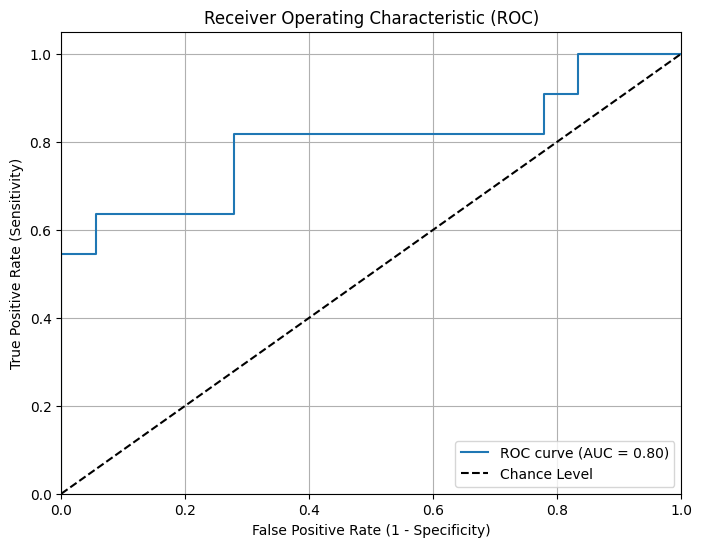

In [21]:
# Step 15: Plot ROC curve

# Use model to generate predictions
cbcPred = cbcModel.predict(cbcX_test)

# Plot model predictions against actual values
plot_roc(cbcY_test,cbcPred)

## **Step 16: Compute Accuracy Score**

**REF: Class_04_2 (Example 5)**

In the cell below, write the code to compute the accuracy score of your binary classification model.


In [ ]:
# Step 13: Compute accuracy score

import numpy as np
from sklearn.metrics import accuracy_score

# Obtain predictions
predictions = cbcModel.predict(cbcX_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary

# Compute accuracy
accuracy = accuracy_score(predictions, cbcY_test)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Accuracy: 62.07%


## **Assignment Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Copy of Assignment_01.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Poly-A Tail**

## **DeepSeek**

![__](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/DeepSeek_logo.svg/1920px-DeepSeek_logo.svg.png)

**DeepSeek** (Chinese: 深度求索; pinyin: Shēndù Qiúsuǒ) is a Chinese artificial intelligence company that develops open-source large language models (LLMs). Based in Hangzhou, Zhejiang, it is owned and funded by Chinese hedge fund High-Flyer, whose co-founder, Liang Wenfeng, established the company in 2023 and serves as its CEO.

The DeepSeek-R1 model provides responses comparable to other contemporary large language models, such as OpenAI's GPT-4o and o1. It is trained at a significantly lower cost—stated at US$6 million compared to $100 million for OpenAI's GPT-4 in 2023—and approximately a tenth of the computing power used for Meta's comparable model, LLaMA 3.1. DeepSeek's AI models were developed amid United States sanctions on China and other countries for chips used to develop artificial intelligence, which were intended to restrict the ability of these countries to develop advanced AI systems. Lesser restrictions were later announced that would affect all but a few countries.

On 10 January 2025, DeepSeek released its first free chatbot app, based on the DeepSeek-R1 model, for iOS and Android; by 27 January, DeepSeek had surpassed ChatGPT as the most-downloaded free app on the iOS App Store in the United States,[10] causing Nvidia's share price to drop by 18%. DeepSeek's success against larger and more established rivals has been described as "upending AI"[10] and ushering in "a new era of AI brinkmanship". DeepSeek's compliance with Chinese government censorship policies and its data collection practices have also raised concerns over privacy and information control in the model, prompting regulatory scrutiny in multiple countries.

DeepSeek makes its generative artificial intelligence algorithms, models, and training details open-source, allowing its code to be freely available for use, modification, viewing, and designing documents for building purposes.However, reports indicate that the API version hosted in China applies content restrictions in accordance with local regulations, limiting responses on topics such as the Tiananmen Square massacre and Taiwan’s status. The company reportedly vigorously recruits young AI researchers from top Chinese universities, and hires from outside the computer science field to diversify its models' knowledge and abilities.

**Background**

In February 2016, High-Flyer was co-founded by AI enthusiast Liang Wenfeng, who had been trading since the 2007–2008 financial crisis while attending Zhejiang University. They began stock-trading with a deep learning model running on GPU on October 21, 2016. Prior to this, they used CPU-based models, mainly linear models. Most trading was done by AI by the end of 2017.

By 2019, he established High-Flyer as a hedge fund focused on developing and using AI trading algorithms. By 2021, High-Flyer exclusively used AI in trading, often using Nvidia chips. DeepSeek has made its generative artificial intelligence chatbot open source, meaning its code is freely available for use, modification, and viewing. This includes permission to access and use the source code, as well as design documents, for building purposes.

In 2021, while running High-Flyer, Liang began stockpiling Nvidia GPUs for an AI project.[20] According to 36Kr, Liang had built up a store of 10,000 Nvidia A100 GPUs, which are used to train AI, before the United States federal government imposed AI chip restrictions on China.

On 14 April 2023,[22] High-Flyer announced the start of an artificial general intelligence lab dedicated to research developing AI tools separate from High-Flyer's financial business. Incorporated on 17 July 2023, with High-Flyer as the investor and backer, the lab became its own company, DeepSeek. Venture capital firms were reluctant to provide funding, as they considered it unlikely that the venture would be able to generate an "exit" in a short period of time.

On May 16, 2023, the company Beijing DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. incorporated under the control of Hangzhou DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. As of May 2024, Liang Wenfeng held 84% of DeepSeek through two shell corporations.

After releasing DeepSeek-V2 in May 2024, which offered strong performance for a low price, DeepSeek became known as the catalyst for China's AI model price war. It was quickly dubbed the "Pinduoduo of AI", and other major tech giants such as ByteDance, Tencent, Baidu, and Alibaba began to cut the price of their AI models to compete with the company. Despite the low price charged by DeepSeek, it was profitable compared to its rivals that were losing money.

DeepSeek is focused on research and has no detailed plans for commercialization, which also allows its technology to avoid the most stringent provisions of China's AI regulations, such as requiring consumer-facing technology to comply with the government's controls on information.

DeepSeek's hiring preferences target technical abilities rather than work experience, resulting in most new hires being either recent university graduates or developers whose AI careers are less established. Likewise, the company recruits individuals without any computer science background to help its technology understand other topics and knowledge areas, including being able to generate poetry and perform well on the notoriously difficult Chinese college admissions exams (Gaokao).

**Training framework**

High-Flyer/DeepSeek has built at least two computing clusters, Fire-Flyer (萤火一号) and Fire-Flyer 2 (萤火二号). Fire-Flyer began construction in 2019 and finished in 2020, at a cost of 200 million yuan. It contained 1,100 GPUs interconnected at a rate of 200 Gbps. It was 'retired' after 1.5 years in operation. Fire-Flyer 2 began construction in 2021 with a budget of 1 billion yuan.[18] It was reported that in 2022, Fire-Flyer 2's capacity had been utilized at over 96%, totaling 56.74 million GPU hours. Of those GPU hours, 27% was used to support scientific computing outside the company.

Fire-Flyer 2 consisted of co-designed software and hardware architecture. On the hardware side, there are more GPUs with 200 Gbps interconnects. The cluster is divided into two "zones", and the platform supports cross-zone tasks. The network topology was two fat trees, chosen for its high bisection bandwidth. On the software side, there are

* **3FS (Fire-Flyer File System):** A distributed parallel file system. It was specifically designed for asynchronous random reads from a dataset, and uses Direct I/O and RDMA Read. In contrast to standard Buffered I/O, Direct I/O does not cache data. Caching is useless for this case, since each data read is random, and would not be reused.
* **hfreduce:** Library for asynchronous communication, originally designed to replace Nvidia Collective Communication Library (NCCL).[30] It was mainly used for allreduce, especially of gradients during backpropagation. It is asynchronously run on the CPU to avoid blocking kernels on the GPU.[28] It uses two-tree broadcast like NCCL.
* **hfai.nn:** Software library of commonly used operators in neural network training, similar to torch.nn in PyTorch.
* **HaiScale Distributed Data Parallel (DDP):** Parallel training library that implements various forms of parallelism in deep learning such as Data Parallelism (DP), Pipeline Parallelism (PP), Tensor Parallelism (TP), Experts Parallelism (EP), Fully Sharded Data Parallel (FSDP) and Zero Redundancy Optimizer (ZeRO). It is similar to PyTorch DDP, which uses NCCL on the backend.
* **HAI Platform:** Various applications such as task scheduling, fault handling, and disaster recovery.
During 2022, Fire-Flyer 2 had 5000 PCIe A100 GPUs in 625 nodes, each containing 8 GPUs. At the time, they chose to exclusively use PCIe instead of DGX version of A100, since at the time the models they trained could fit within a single 40 GB GPU VRAM, so there was no need for the higher bandwidth of DGX (i.e. they required only data parallelism but not model parallelism).[30] Later, they also incorporated NVLinks and NCCL, to train larger models that required model parallelism.